<a href="https://colab.research.google.com/github/CharleyRutledge/Age-Prediction-System/blob/main/Final_year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final year Project
## Age detection and prediction


# Library installs and imports

In [ ]:
# @title
# Tensorflow
try:
  import tensorflow as tf
except:
  !pip install tensorflow
  import tensorflow as tf

# OpenCV
try:
 import cv2 as cv2
except:
  !pip install cv2
  import cv2 as cv2

# Numpy
try:
 import numpy as np
except:
  !pip install numpy
  import numpy as np

# Matplotlib
try:
 import matplotlib.pyplot as plt
except:
  !pip install matplotlib
  import matplotlib.pyplot as plt

# PILLOW Image processing library
try:
 import PIL
except:
  !pip install Pillow
  import PIL

# OS
try:
 import os
except:
  !pip install os
  import os

# Progress bar animation
try:
 from tqdm.notebook import tqdm
except:
  "could not install tqdm"

# Kaggle
try:
 import kaggle
except:
  !pip install -q kaggle

# Pandas
try:
 import pandas as pd
except:
  "unable to install pandas"

# Seaborn
try:
 import seaborn as sns
except:
  "unable to install Seaborn"

# Keras
try:
 import keras
except:
  !pip install keras
  import keras

# imports to categorical
from keras.utils import to_categorical
# Random
import random
# Deals with Zip Files
from zipfile import ZipFile
# google colab patches
from google.colab.patches import cv2_imshow

# Mounting the google drive
Allows access to dataset on google drive

In [ ]:
# @title
try:
  from google.colab import drive
  drive.mount('/content/drive')
except Exception as e:
  print(f"An error occurred while mounting Google Drive: {e}")

Mounted at /content/drive


# Removes the sample_data directory and files
This is stored by default on all notebooks but it is not required

In [ ]:
# @title
!rm -r /content/sample_data/

# Printing the GPU information

In [ ]:
# @title
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# Creates  a folder to store the augmented dataset

In [ ]:
# @title
! mkdir AugmentedDataset

# Download and extract the combined_faces_train_augmented dataset from Drive to the AugmentedDataset folder

In [ ]:
# @title
import shutil
# Unzipping the dataset file combined_faces.zip
combined_faces_zip_path = "/content/drive/My Drive/1.1_age_input_output/input/combined_faces_train_augmented.zip"

source_path = combined_faces_zip_path

# Replace 'destination_path' with the desired destination path in Colab
destination_path = '/content/'

shutil.copy(source_path, destination_path)

'/content/combined_faces_train_augmented.zip'

# Unzips the augmented zip to the augmented dataset folder

In [ ]:
# @title
! unzip -q combined_faces_train_augmented.zip -d AugmentedDataset

Removes the dataset after unzipping

In [ ]:
# @title
! rm /content/combined_faces_train_augmented.zip

# Counts the number of images in the augmented dataset

In [ ]:
# @title
Augmented_Dataset = "/content/AugmentedDataset/content/combined_faces_train_augmented"
num_files = len(os.listdir(Augmented_Dataset))

print(f"There are {num_files} files in the directory '{Augmented_Dataset}'.")

There are 234400 files in the directory '/content/AugmentedDataset/content/combined_faces_train_augmented'.


# Unmounts access to google drive

In [ ]:
# Unmount Google Drive
drive.flush_and_unmount()

# Loading the augmented data



Age label is assigned to the corresponding image path.
The Age is extracted from the image path.

In [ ]:
# @title
from PIL import Image
# Lables - age, image paths
age_label = []
image_Paths = []
images = []

for i in tqdm(os.listdir(Augmented_Dataset)):
  image_Path = os.path.join(Augmented_Dataset, i)
  image_Paths.append(image_Path)
  images.append(Image.open(image_Path))
  age_label.append(int(i.split('_')[0]))

  0%|          | 0/234400 [00:00<?, ?it/s]

# Creating and manipulating dataframes

Creates a Dataframe series from two series, Images and age
The dataframe displays the forst 5 and last 5 images and corresponding ages

In [ ]:
# @title
images = pd.Series(list(image_Paths), name = 'Images')
ages = pd.Series(list(age_label), name = 'Ages')
df = pd.concat([images, ages], axis=1)
df

,Images,Ages
0,/content/AugmentedDataset/content/combined_fac...,28
1,/content/AugmentedDataset/content/combined_fac...,90
2,/content/AugmentedDataset/content/combined_fac...,28
3,/content/AugmentedDataset/content/combined_fac...,5
4,/content/AugmentedDataset/content/combined_fac...,38
...,...,...
234395,/content/AugmentedDataset/content/combined_fac...,34
234396,/content/AugmentedDataset/content/combined_fac...,5
234397,/content/AugmentedDataset/content/combined_fac...,31
234398,/content/AugmentedDataset/content/combined_fac...,55


Showing the first image and age

28


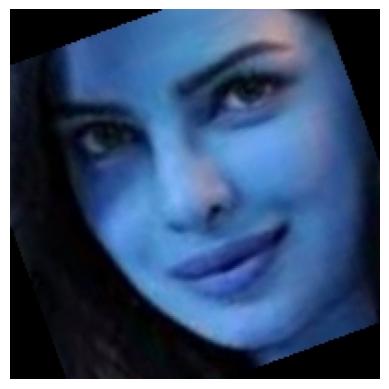

In [ ]:
# @title
img = Image.open(df['Images'][0])
plt.axis('off')
plt.imshow(img)
print(df['Ages'][0])

Showing the last image and age

86


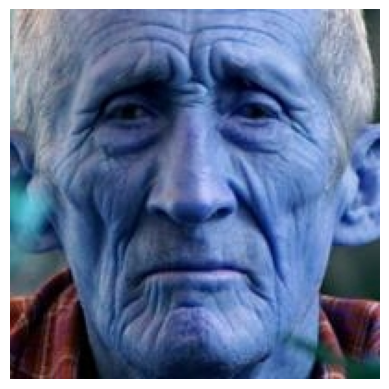

In [ ]:
# @title
img = Image.open(df['Images'][234399])
plt.axis('off')
plt.imshow(img)
print(df['Ages'][234399])

# Creates a Charts folder

In [ ]:
# @title
! mkdir Charts

mkdir: cannot create directory ‘Charts’: File exists


# Statistical information about the dataset


The count

---

The standard deviation which is the distance between each datapoint

---

The Min,25%,50%,75% and Max labels show the percentiles alongside the minimum and maximum value in the dataset

In [ ]:
# @title
df.describe()

,Ages
count,234400.000000
mean,32.160282
std,21.490919
min,1.000000
25%,18.000000
50%,28.000000
75%,45.000000
max,116.000000


## Generates a histogram and Kernel density estimate(KDE) plot for the Ages dataframe

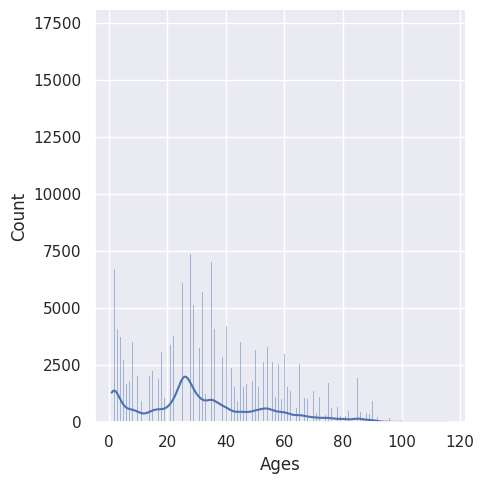

In [ ]:
# @title
num_bins = int(np.sqrt(len(df)))
sns.set_theme()
sns.displot(df['Ages'],kde=True, bins=num_bins)
plt.savefig('Charts/Unfilteredd_Data_Hist.png')

## Displays the occurrences of ages in increments of 5.

In [ ]:
# @title
# Define age bins
bins = range(0, max(df['Ages']) + 6, 5)

# Create a new column 'Age Range' by binning the 'Ages'
df['Age Range'] = pd.cut(df['Ages'], bins=bins, right=False)

# Group by 'Age Range' and count occurrences
age_range_counts = df.groupby('Age Range').size().reset_index(name='Count')

# Print the results
print(age_range_counts)

     Age Range  Count
0       [0, 5)  30150
1      [5, 10)  11900
2     [10, 15)   7670
3     [15, 20)  11500
4     [20, 25)  21020
5     [25, 30)  41080
6     [30, 35)  19470
7     [35, 40)  19720
8     [40, 45)  10310
9     [45, 50)  10020
10    [50, 55)  13110
11    [55, 60)   9520
12    [60, 65)   7500
13    [65, 70)   6310
14    [70, 75)   3890
15    [75, 80)   3610
16    [80, 85)   2540
17    [85, 90)   3270
18    [90, 95)   1230
19   [95, 100)    320
20  [100, 105)    120
21  [105, 110)     40
22  [110, 115)     50
23  [115, 120)     50


The age range 25 -30 and 0-5 occurs the most in the dataset. This is most likely why the histogram chart looks uneven

Exploring the data further in this age range reveals that age 26 occurs 17200 times and 1 year olds occur 15640 in the dataset.

In [ ]:
# @title
# Filter rows within the specified age range [25, 30)
filtered_df = df[(df['Ages'] >= 25) & (df['Ages'] < 30)]

# Count the occurrences of each individual age
age_counts = filtered_df['Ages'].value_counts().sort_index()

# Create a DataFrame for better visualization
result_df = pd.DataFrame({
    'Age': age_counts.index,
    'Count': age_counts.values
})

# Print the table
print(result_df)

   Age  Count
0   25   6080
1   26  17200
2   27   5320
3   28   7350
4   29   5130


In [ ]:
# @title
# Filter rows within the specified age range [25, 30)
filtered_df = df[(df['Ages'] >= 0) & (df['Ages'] < 5)]

# Count the occurrences of each individual age
age_counts = filtered_df['Ages'].value_counts().sort_index()

# Create a DataFrame for better visualization
result_df = pd.DataFrame({
    'Age': age_counts.index,
    'Count': age_counts.values
})

# Print the table
print(result_df)

   Age  Count
0    1  15640
1    2   6700
2    3   4070
3    4   3740


The highest number of images in the data are at the age of 25 and at age 1.
These must reduced so they do not cause the model to overfit

## Samples the amount of images of 26 years old by 60%


In [ ]:
# @title
# Filter out rows where 'Ages' is 26
df_26 = df[df['Ages'] == 26]

# Sample 60% of the rows where 'Ages' is 26
df_26_sampled = df_26.sample(frac=0.6)

# Filter out the sampled rows from the original DataFrame
df = pd.concat([df, df_26_sampled]).drop_duplicates(keep=False)

# Reset index for the final DataFrame
df = df.reset_index(drop=True)

Plots the dataset with the 26 year olds reduced and saves it

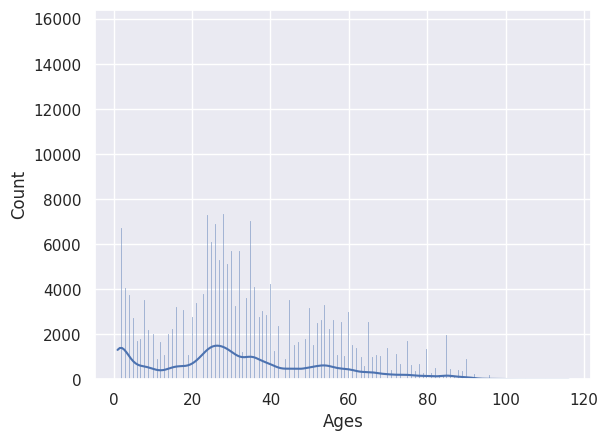

In [ ]:
# @title
num_bins = int(np.sqrt(len(df)))
sns.histplot(df['Ages'],kde=True, bins=num_bins)

plt.savefig('Charts/Sampled_26_Year_olds_Hist.png')

## Samples the amount of images of 1 years old by 70%


In [ ]:
# @title
# Filter out rows where 'Ages' is 1
df_1 = df[df['Ages'] == 1]

# Sample 70% of the rows where 'Ages' is 1
df_1_sampled = df_1.sample(frac=0.7)

# Filter out the sampled rows from the original DataFrame
df = pd.concat([df, df_1_sampled]).drop_duplicates(keep=False)

# Reset index for the final DataFrame
df = df.reset_index(drop=True)

Plots the dataset with 1 year olds reduced and saves it

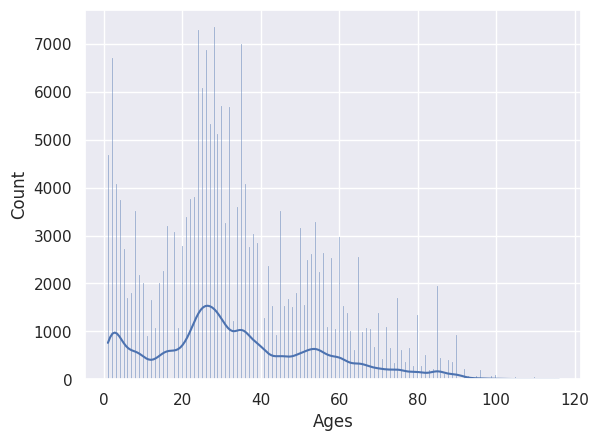

In [ ]:
# @title
num_bins = int(np.sqrt(len(df)))
sns.histplot(df['Ages'],kde=True, bins=num_bins)

plt.savefig('Charts/Sampled_1_Year_olds_Hist.png')

There are little images for people over the age of 50 so they will be excluded

In [ ]:
# @title
df = df[df['Ages'] < 50]

Plots the dataset with the 50 year olds removed and saves it


> The dataset will have a maximum age of 49 years old



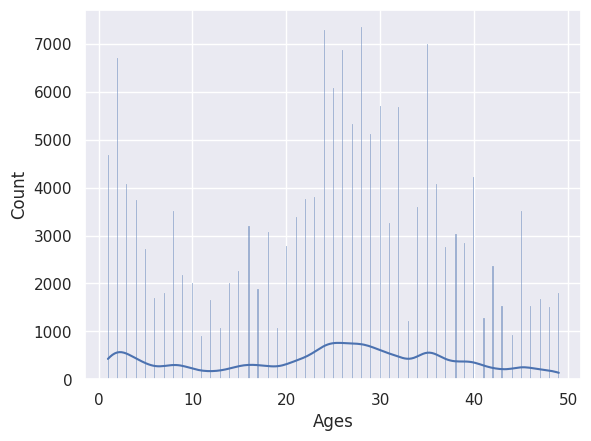

In [ ]:
# @title
num_bins = int(np.sqrt(len(df)))
sns.histplot(df['Ages'],kde=True, bins=num_bins)

plt.savefig('Charts/Over_50_Removed_Hist.png')

# Create an age range


Defines the amount of classes to be assigned to the dataset

3 classes are creates containing age ranges and return integers

In [ ]:
# @title
def class_labels_reassign(age):
    if 0 <= age <= 16:
        return 0 #"age is between 0 - 16"
    elif 17 <= age <= 25:
        return 1 #"age is between 17 - 25"
    elif 26 <= age <= 49:
        return 2 #"age is 49 or above"

# Counts the dataset after Final reduction

In [ ]:
# @title
print(len(df['Ages']))

161572


# Preparing the Augmented Dataset for more filters and augmentations

# Apply augmentations


> Since the dataset has already been augmented, I will only apply greyscaling to a random number of images




 ## Applies greyscaling to images

In [ ]:
# @title
def apply_GreyScale(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return gray

Processing the data as follows:

> Resizes the images W x H = 200,200

> Applying grey scale to a subset of images

### Converts the list to a numpy array and convert the age values to a numpy array









In [ ]:
# @title
x = []

for img_path in tqdm(df['Images']):
    # Open and resize the image
    img = Image.open(img_path).resize((200, 200), Image.LANCZOS)

    # Convert PIL Image to numpy array
    img_array = np.array(img)

    #greyscales the image
    greyscaledImg = apply_GreyScale(img_array)

    # Append the greyscaling
    x.append(greyscaledImg)

# Convert the list to a numpy array
x = np.array(x)

# Convert age values to a numpy array
y = np.array(df['Ages'])

  0%|          | 0/161572 [00:00<?, ?it/s]

# Example of a Augmented image with new filter after Processing

Displays the first image and the associated age

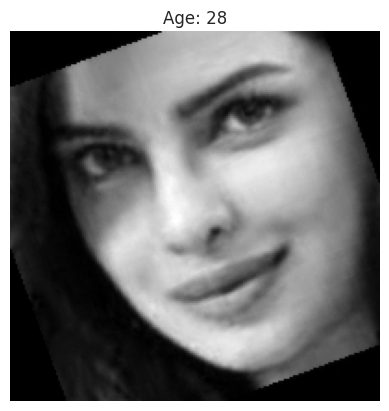

In [ ]:
# @title
first_image = x[0]
associated_age = y[0]

# Display the first image'
plt.axis('off')
plt.imshow(first_image, cmap='gray')
plt.title(f'Age: {associated_age}')
plt.show()

# Split the data into test and train

Converts the ages to a list, iterates over it and reassigns values using the class_labels_reassign function.

In [ ]:
# @title
Y_train_age_toList = df['Ages'].tolist()

for y in range(0,len(Y_train_age_toList)):
   Y_train_age_toList[y] = class_labels_reassign(Y_train_age_toList[y])

print(Y_train_age_toList)

[2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 

Splitting the data

In [ ]:
# @title
from sklearn.model_selection import train_test_split

# Train test split data
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, Y_train_age_toList, test_size=0.3, stratify=Y_train_age_toList)

# Display training information
print("Number of images in x_train_age:", len(x_train_age))
print("Number of images in x_test_age:", len(x_test_age))
print("Number of labels in y_train_age:", len(y_train_age))
print("Number of labels in y_test_age:", len(y_test_age))

Number of images in x_train_age: 113100
Number of images in x_test_age: 48472
Number of labels in y_train_age: 113100
Number of labels in y_test_age: 48472


one-hot encoding

In [ ]:
# @title
from keras.utils import to_categorical
# One-hot encode the training labels
y_train_age_onehot = to_categorical(y_train_age, num_classes= 3)

# One-hot encode the testing labels
y_test_age_onehot = to_categorical(y_test_age, num_classes= 3)

Verifying the values match before and after one-hot encoding

In [ ]:
# @title
print("Original training labels classes:")
print(y_train_age)

print("\nOne-hot encoded training labels:")
print(y_train_age_onehot)

# Decode the one-hot encoded labels
decoded_labels = np.argmax(y_train_age_onehot, axis=1)
print(decoded_labels)

Original training labels classes:
[2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1,

# Convolutional Neural network architecture

Contains:
> A Sequential Architecture

> 4 Convolutional layers

> 4 Average Pooling layers

> 1 Global Pooling layer

> 2 Dense Layers


Neural network design Reference to Colab notebook:
Google.com. (2019). Google Colaboratory. [online] Available at: https://colab.research.google.com/drive/1wTAWdgvZSbXv9hcWxhY4AT1oCDIDmoCv#scrollTo=wHlOO5RbfZSF [Accessed 19 Feb. 2024].

Reference to Creative commons license
GitHub. (2024). age-detection-cnn-model/LICENSE at main · skillcate/age-detection-cnn-model. [online] Available at: https://github.com/skillcate/age-detection-cnn-model/blob/main/LICENSE [Accessed 19 Feb. 2024].

‌

In [ ]:
# @title
from keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D, Dense
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential

# Defining the architecture of the sequential neural network.
final_cnn = Sequential()

# Input layer with 32 filters, followed by an AveragePooling2D layer.
final_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(200, 200, 1)))    # 3rd dim = 1 for grayscale images.
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# Three Conv2D layers with filters increasing by a factor of 2 for every successive Conv2D layer.
final_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))
final_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))
final_cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# A GlobalAveragePooling2D layer before going into Dense layers below.
# GlobalAveragePooling2D layer gives no. of outputs equal to no. of filters in last Conv2D layer above (256).
final_cnn.add(GlobalAveragePooling2D())

# One Dense layer with 132 nodes so as to taper down the no. of nodes from no. of outputs of GlobalAveragePooling2D layer above towards no. of nodes in output layer below (7).
final_cnn.add(Dense(132, activation='relu'))

# Output layer with 3 nodes (equal to the no. of classes).
final_cnn.add(Dense(3, activation='softmax'))

Compiling the above created CNN architecture.


*   loss fucntion: categorical crossentropy
*   optimizer: adam
*   Metrics: categorical_accuracy

In [ ]:
# @title
final_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Saving the model structure

Creates a folder where the model structure is structured

In [ ]:
# @title
! mkdir ModelStructure

imports plot_model and saves the model to ModelStructure folder

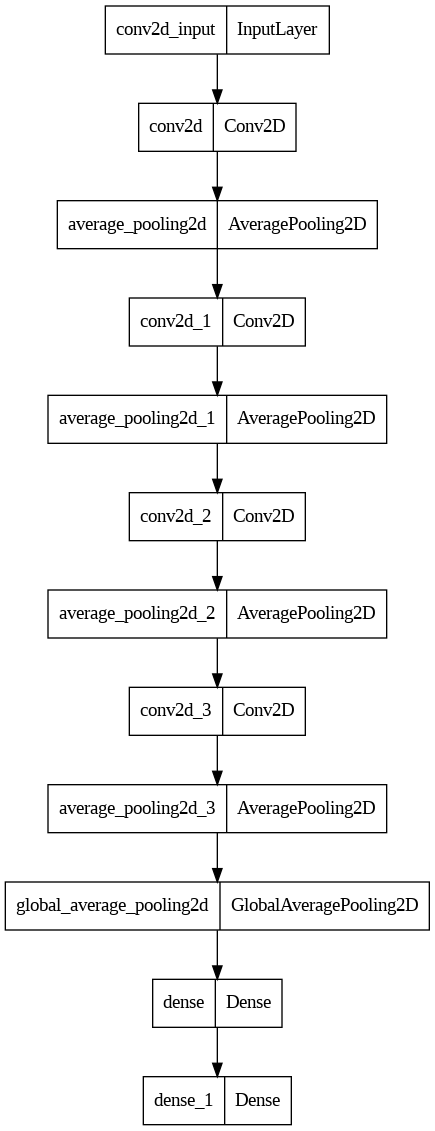

In [ ]:
# @title
from keras.utils import plot_model
plot_model(final_cnn, to_file=f'ModelStructure/NeuralNetwork_Design.png')

# Checkpoints

Create a folder to store Model checkpoints

In [ ]:
# @title
! mkdir Model_Checkpoints

Creating a ModelCheckpoint callback object to save the model according to the value of val_accuracy.

> Saves the model weights so it can be loaded later

> Saves the best weights only when the model is deemed the best version, does not update if no improvment is made

> Verbose displays more information about the iteration

In [ ]:
# @title
checkpoint = ModelCheckpoint(filepath=f"/content/Model_Checkpoints/age_model_checkpoint.keras",
                             monitor='val_categorical_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                            )

# Training the model

using fit(), this is how the model trains with the data


> Trained by seperating the batch sized into 64

> epochs is the number of iterations the model will train

> Model results are saved to the checkpoints folders

> Shuffle changes the order of the images and mixes them up

In [ ]:
# @title
final_cnn_history = final_cnn.fit(x_train_age,
                                  y_train_age_onehot,
                                  batch_size=64,
                                  validation_data=(x_test_age, y_test_age_onehot),
                                  epochs=7,
                                  callbacks=[checkpoint],
                                  shuffle=True
                                 )

Epoch 1/7
1768/1768 [==============================] - ETA: 0s - loss: 0.8954 - categorical_accuracy: 0.6124
Epoch 1: val_categorical_accuracy improved from -inf to 0.67511, saving model to /content/Model_Checkpoints/age_model_checkpoint.keras
1768/1768 [==============================] - 57s 29ms/step - loss: 0.8954 - categorical_accuracy: 0.6124 - val_loss: 0.7649 - val_categorical_accuracy: 0.6751
Epoch 2/7
1768/1768 [==============================] - ETA: 0s - loss: 0.7221 - categorical_accuracy: 0.6911
Epoch 2: val_categorical_accuracy improved from 0.67511 to 0.70414, saving model to /content/Model_Checkpoints/age_model_checkpoint.keras
1768/1768 [==============================] - 45s 26ms/step - loss: 0.7221 - categorical_accuracy: 0.6911 - val_loss: 0.6995 - val_categorical_accuracy: 0.7041
Epoch 3/7
1767/1768 [============================>.] - ETA: 0s - loss: 0.6432 - categorical_accuracy: 0.7263
Epoch 3: val_categorical_accuracy improved from 0.70414 to 0.73277, saving model t

# Plotting the model


Plotting the model according to categorical_accuracy and val_categorical_accuracy, loss and val_loss weights

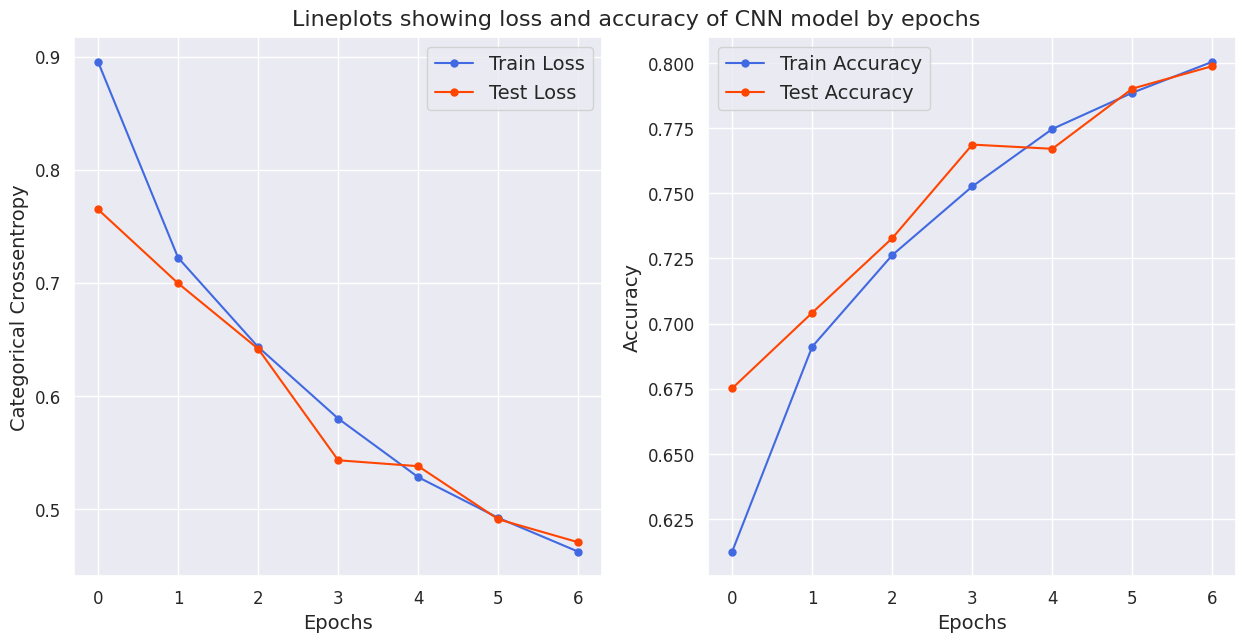

In [ ]:
# @title
# Checking and retrieves the train and test loss and accuracy values from the neural network above.
train_loss = final_cnn_history.history['loss']
test_loss = final_cnn_history.history['val_loss']
train_accuracy = final_cnn_history.history['categorical_accuracy']
test_accuracy = final_cnn_history.history['val_categorical_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
fig.suptitle('Showing ')

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color='orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)
plt.savefig('Charts/loss_and_accuracy_plot.png')


# Creates a folder to store the trained model and saves the model in keras format in the Model Storage folder

In [ ]:
# @title
! mkdir ModelStorage

Save the model

In [ ]:
# @title
final_cnn.save("ModelStorage/TrainedModel1.keras")

# Creates a folder called Model Summary and saves the model summary

In [ ]:
# @title
! mkdir ModelSummary

# Load the model and stores it in a variable

In [ ]:
# @title
Trained_model = tf.keras.models.load_model('ModelStorage/TrainedModel1.keras')

Saves a model summary to the Model summary folder

In [ ]:
# @title
# Open a file in write mode to save the summary within the specified folder
with open(f'ModelSummary/TrainedModel1_summary.txt', 'w') as f:
    # Redirect the print output to the file
    print("Model Summary:", file=f)
    Trained_model.summary(print_fn=lambda x: f.write(x + '\n'))

# Prints the model architecture

In [ ]:
# @title
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (Average  (None, 99, 99, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 48, 48, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 23, 23, 128)       0

# Evaluates the model on the test dataset

In [ ]:
# @title
final_cnn_score = Trained_model.evaluate(x_test_age, y_test_age_onehot, batch_size=32, verbose=2)

print("Evaluation Loss:", final_cnn_score[0])

1515/1515 - 10s - loss: 0.4515 - categorical_accuracy: 0.8067 - 10s/epoch - 6ms/step
Evaluation Loss: 0.45149821043014526


Prints the score summary based on the above evaluation results

In [ ]:
# @title
final_cnn_labels = Trained_model.metrics_names
print(f'CNN model {final_cnn_labels[0]} \t= {round(final_cnn_score[0], 3)}')
print(f'CNN model {final_cnn_labels[1]} \t= {round(final_cnn_score[1], 3)}')

CNN model loss 	= 0.451
CNN model categorical_accuracy 	= 0.807


# Creates a folder to store confusion matrix results

In [ ]:
# @title
! mkdir Confusion_matrix_Result

mkdir: cannot create directory ‘Confusion_matrix_Result’: File exists


# Creates and displays a confusion matrix


1515/1515 [==============================] - 6s 4ms/step


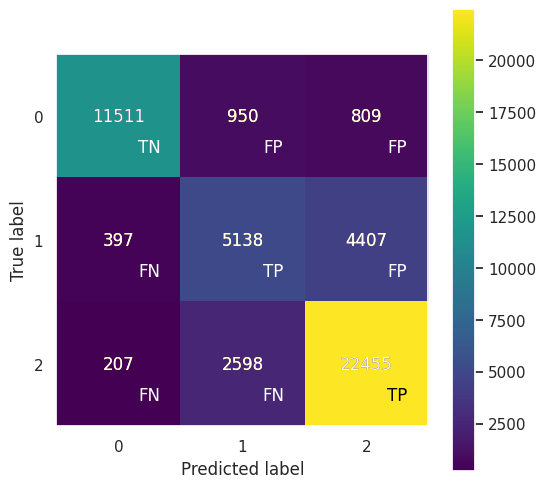

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91     13270
           1       0.59      0.52      0.55      9942
           2       0.81      0.89      0.85     25260

    accuracy                           0.81     48472
   macro avg       0.78      0.76      0.77     48472
weighted avg       0.80      0.81      0.80     48472



<Figure size 640x480 with 0 Axes>

In [ ]:
# @title
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the reshaped array
final_cnn_pred_probs = Trained_model.predict(x_test_age)
final_cnn_pred = np.argmax(final_cnn_pred_probs, axis=-1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test_age_onehot, axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, final_cnn_pred)

# Plot confusion matrix with ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
fig, ax = plt.subplots(figsize=(6, 6))
cm_display.plot(ax=ax)  # Use ax parameter to customize the plot

# Remove gridlines
ax.grid(False)

# Add annotations for the quadrants
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white", fontsize=12)

# Add labels for the quadrants
ax.text(0.25, 0.25, "TN", ha="center", va="center", color="white", fontsize=12)
ax.text(1.25, 0.25, "FP", ha="center", va="center", color="white", fontsize=12)
ax.text(2.25, 0.25, "FP", ha="center", va="center", color="white", fontsize=12)

ax.text(0.25, 1.25, "FN", ha="center", va="center", color="white", fontsize=12)
ax.text(1.25, 1.25, "TP", ha="center", va="center", color="white", fontsize=12)
ax.text(2.25, 1.25, "FP", ha="center", va="center", color="white", fontsize=12)

ax.text(0.25, 2.25, "FN", ha="center", va="center", color="white", fontsize=12)
ax.text(1.25, 2.25, "FN", ha="center", va="center", color="white", fontsize=12)
ax.text(2.25, 2.25, "TP", ha="center", va="center", color="black", fontsize=12)

# Show the plot
plt.show()

# Save the plot
plt.savefig('/content/Confusion_matrix_Result/Confusion_matrix_Result.png')

# Display classification report
print("Classification Report:\n", classification_report(y_true, final_cnn_pred))

# Testing Phase


> New data will be introduced and tested to see how accurate the model is at predicting the age range of an new person.



A user must have a test image ready

> Opens an interface so the user can upload a photo, the photo is then displayed after


Saving Charley.jpg to Charley.jpg


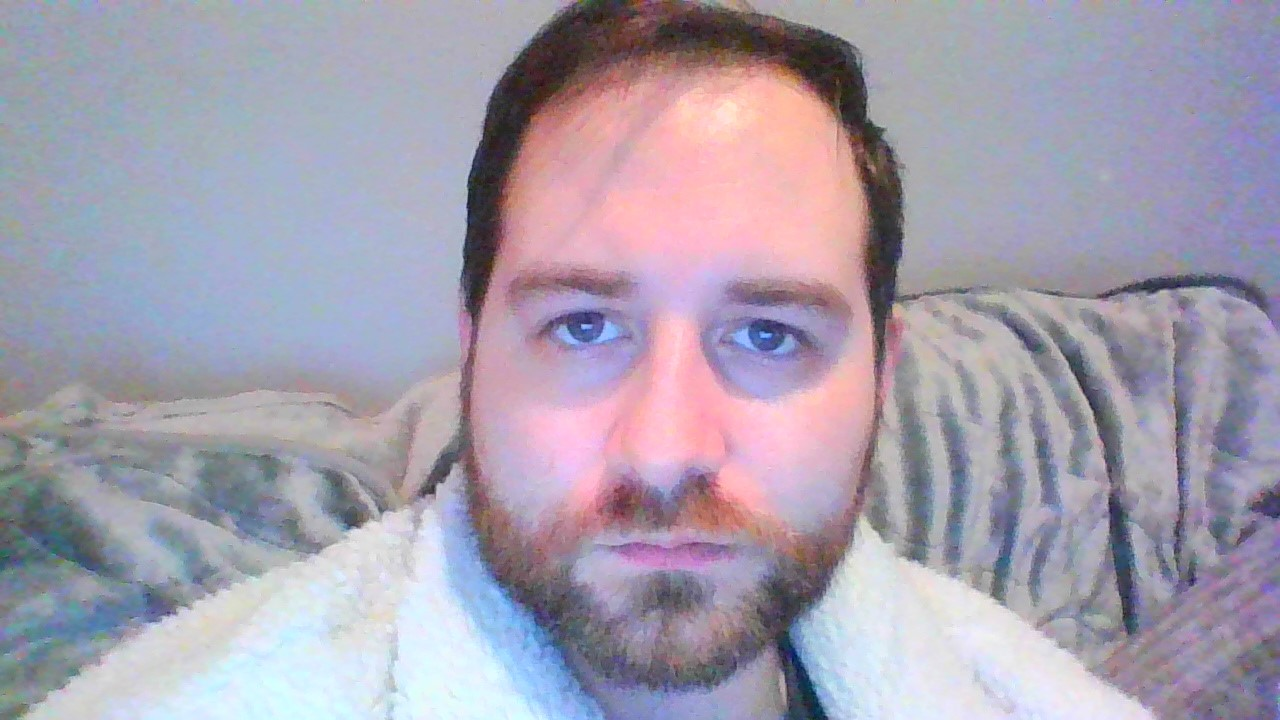

In [ ]:
# @title
from google.colab import files
# Upload an image file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Read the uploaded image using OpenCV
image = cv2.imread(file_name)

# Display the uploaded image
cv2_imshow(image)

Maps the class integers to a string

---



In [ ]:
# @title
def map_label_to_description(label):
    if label == 0:
        return "Age is between 0 - 16"
    elif label == 1:
        return "Age is between 17 - 27"
    elif label == 2:
        return "Age is 28 up to 49"
    else:
        return "Unknown Age Range"

Processes and predicts the age range of the image

1.   Resizes the image if it does not match the required height and width of 200x200.
2.   Converts the image to a numpy array and applies greyscaling to the image
3.   It is then normalized and reshaped
4.   It is passed to the model and then the model makes a prediction which is printed.

In [ ]:
# @title
def process_and_predict1(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200, 200), Image.LANCZOS )
    else:
        if width > height:
            left = width / 2 - height / 2
            right = width / 2 + height / 2
            top = 0
            bottom = height
            im = im.crop((left, top, right, bottom))
            im = im.resize((200, 200), Image.LANCZOS )
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left, top, right, bottom))
            im = im.resize((200, 200), Image.LANCZOS )

    # Convert PIL Image to numpy array
    img_array = np.array(im)

    # apply greyscale to image
    greyscaledImg = apply_GreyScale(img_array)

    # Convert to NumPy array
    ar = np.asarray(greyscaledImg)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 1)

    age_prediction = Trained_model.predict(ar)

    # Extract the first element from the array if it's a 2D array
    if age_prediction.ndim == 2:
        predicted_age_label = class_labels_reassign(int(age_prediction[0, 0]))

        # Map numeric label to descriptive string
        age_range_description = map_label_to_description(predicted_age_label)

        print('Predicted Age Range:', age_range_description)
    else:
        print('Unexpected array shape. Check the structure of the output.')

    return im.resize((300, 300), Image.LANCZOS)

This calls the process and predict and passed the image as a parameter

1/1 [==============================] - 0s 340ms/step
Predicted Age Range: Age is between 0 - 16


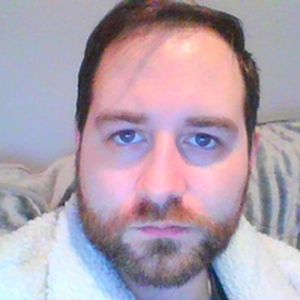

In [ ]:
# @title
process_and_predict1('Charley.jpg')

## Testing the model on its own data
1.   Displays 10 images from the dataset
2.   predicts the age of the images
3.   Prints the predicted age and the actual age for comparison

In [ ]:
# @title
import os

# Create a directory to save the images if it doesn't exist
output_dir = '/content/imageEval/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Check if the DataFrame is not empty
if not df.empty:
    for image_index in range(10):  # Adjust the range based on how many indexes you want to print
        try:
            # Open an image using the file path from the DataFrame
            img_path = df['Images'].iloc[image_index]  # Use iloc to access by integer location
            img = Image.open(img_path)

            # Display the image
            plt.axis('off')
            plt.imshow(img, cmap='gray')

            # Get original and predicted ages
            original_age = df['Ages'].iloc[image_index]
            pred_age = round(Trained_model.predict(x[image_index].reshape(1, 200, 200, 1))[0][0])

            # Save the image with associated values in the filename
            filename = f'image_{image_index}_original_{original_age}_predicted_{pred_age}.png'
            plt.savefig(os.path.join(output_dir, filename))  # Save the image
            plt.close()  # Close the plot

            # Print the original and predicted ages
            print(f"Index: {image_index}, Original Age: {original_age}, Predicted Age: {pred_age}")

        except KeyError:
            print(f"Index {image_index} is not present in the DataFrame.")
else:
    print("DataFrame is empty.")


1/1 [==============================] - 0s 21ms/step
Index: 0, Original Age: 28, Predicted Age: 0
1/1 [==============================] - 0s 21ms/step
Index: 1, Original Age: 28, Predicted Age: 0
1/1 [==============================] - 0s 20ms/step
Index: 2, Original Age: 5, Predicted Age: 1
1/1 [==============================] - 0s 20ms/step
Index: 3, Original Age: 38, Predicted Age: 0
1/1 [==============================] - 0s 19ms/step
Index: 4, Original Age: 35, Predicted Age: 0
1/1 [==============================] - 0s 20ms/step
Index: 5, Original Age: 21, Predicted Age: 0
1/1 [==============================] - 0s 19ms/step
Index: 6, Original Age: 1, Predicted Age: 1
1/1 [==============================] - 0s 21ms/step
Index: 7, Original Age: 29, Predicted Age: 0
1/1 [==============================] - 0s 18ms/step
Index: 8, Original Age: 32, Predicted Age: 0
1/1 [==============================] - 0s 21ms/step
Index: 9, Original Age: 2, Predicted Age: 1


# Save results to a zip

Note:The folder_to_zip path must be replaces with the name of the folder to be downloaded

In [ ]:
# @title
import shutil
zip_folder(folder_to_zip = "/content/ModelStorage")

def zip_folder(folder_to_zip):

    # Specify the name of the zip file
    zip_filename = f'{folder_to_zip}.zip'

    # Create the zip file
    shutil.make_archive(zip_filename.split('.')[0], 'zip', folder_to_zip)

    print(f"Zipping complete for '{folder_to_zip}' folder.")

Zipping complete for '/content/ModelStorage' folder.
